In [1]:
from googlesearch import search
import pandas as pd
from datetime import datetime, timedelta

In [ ]:
categories = {
    "Airport Disruption": ["airport disruption", "flight delay", "airport closure"],
    "Bankruptcy": ["bankruptcy news", "financial insolvency", "company bankruptcy"],
    "Business Spin-off": ["business spin-off", "corporate separation", "division spin-off"],
    "Business Sale": ["business sale news", "company acquisition", "selling a business"],
    "Chemical Spill": ["chemical spill", "toxic waste spill", "environmental contamination"],
    "Corruption": ["corruption scandal", "government corruption", "bribery investigation"],
    "Company Split": ["company split news", "corporate division", "splitting a corporation"],
    "Cyber Attack": ["cyber attack", "data breach", "cybersecurity incident"],
    "FDA/EMA/OSHA Action": ["FDA action", "EMA regulation", "OSHA compliance"],
    "Factory Fire": ["factory fire", "industrial blaze", "manufacturing plant fire"],
    "Fine": ["legal fine", "financial penalty", "monetary fine"],
    "Geopolitical": ["geopolitical news", "international relations", "global politics"],
    "Leadership Transition": ["leadership change", "CEO transition", "change in leadership"],
    "Legal Action": ["legal action news", "lawsuit update", "court case"],
    "Merger & Acquisition": ["merger and acquisition", "M&A news", "corporate merger"],
    "Port Disruption": ["port disruption", "shipping delay", "dockworker strike"],
    "Protest/Riot": ["protest news", "civil unrest", "riot demonstration"],
    "Supply Shortage": ["supply shortage", "product scarcity", "shortfall in supply"],
    "Earthquake": ["Earthquake"],
    "Extreme Weather": ["extreme weather", "severe weather conditions", "weather catastrophe"],
    "Flood": ["flood news", "flooding event", "flash flood"],
    "Hurricane": ["hurricane news", "tropical storm", "hurricane forecast"],
    "Tornado": ["tornado news", "twister warning", "tornado outbreak"],
    "Volcano": ["volcano eruption", "volcanic activity", "volcanic eruption"],
    "Human Health": ["public health crisis", "healthcare news", "health epidemic"],
    "Power Outage": ["power outage", "electricity failure", "grid blackout"]
}

In [2]:
resp = search(term="Earthquake",num_results=2,advanced=True)
resp = list(resp)
print(resp)

[SearchResult(url=https://en.wikipedia.org/wiki/Earthquake, title=Earthquake, description=An earthquake is the shaking of the surface of the Earth resulting from a sudden release of energy in the Earth's lithosphere that creates seismic waves.), SearchResult(url=https://www.britannica.com/science/earthquake-geology, title=Earthquake | Definition, Causes, Effects, & Facts, description=14 Sept 2023 — Earthquake, any sudden shaking of the ground caused by the passage of seismic waves through Earth's rocks. Earthquakes occur most often ...)]


In [3]:
def scrape_news(category, keywords, num_results=1):

    news_data = []
    visited_urls = set()  # Keep track of visited URLs to remove duplicates

    for keyword in keywords:
        query = f"{keyword}"
        resp = search(term=query,num_results=num_results,advanced=True)
        print('resp: ', resp)
        for result in list(resp):
            print('result: ', result)
            if result in visited_urls:
                print(f'Skipping duplicate URL: {result}')
                continue  # Skip duplicate URLs
            try:
                print(result,type(result))
                article = {
                    "Category": category,
                    "Title": result.title,
                    "URL": result.url,
                }

                # Extract additional information (title and publication date) from the article's URL or source
                # This part would require specific implementation based on the news source's website structure.

                # Append the article data to the news_data list
                news_data.append(article)

                # Add the URL to the visited URLs set
                visited_urls.add(result)
            except Exception as e:
                print(f"Error processing {result}: {str(e)}")

    return news_data

# Example usage:
categories = {
    "Airport Disruption": ["airport disruption", "flight delay"],
    "Geopolitical": ["geopolitical news", "international relations", "global politics"],
}

all_news = []
for category, keywords in categories.items():
    news = scrape_news(category, keywords)
    all_news.extend(news)

# Convert the collected data to a DataFrame for further analysis
news_df = pd.DataFrame(all_news)

# Save the data to a CSV file
news_df.to_csv("news_data.csv", index=False)


resp:  <generator object search at 0x0000024FBFB4F840>
result:  SearchResult(url=https://www.bbc.com/news/uk-66644369, title=Air traffic disruption caused by flight data issue, description=29 Aug 2023 — Widespread flight disruption that left thousands of passengers stranded was caused by incoming flight data, air traffic control bosses say.)
SearchResult(url=https://www.bbc.com/news/uk-66644369, title=Air traffic disruption caused by flight data issue, description=29 Aug 2023 — Widespread flight disruption that left thousands of passengers stranded was caused by incoming flight data, air traffic control bosses say.) <class 'googlesearch.SearchResult'>
resp:  <generator object search at 0x0000024FBFC6B140>
result:  SearchResult(url=https://www.directasia.com/blog/what-to-do-if-flight-is-cancelled-or-delayed, title=Ways to Handle Delayed and Cancelled Flights | Direct Asia, description=24 May 2023 — What should you do if your flight is cancelled or delayed? Get to know your rights for co

## Attempt Multithreading

In [1]:
import logging
from googlesearch import search
import pandas as pd
from datetime import datetime, timedelta
import multiprocessing

# Configure the logging module
logging.basicConfig(filename="scraper.log", level=logging.INFO, format="%(asctime)s - %(levelname)s: %(message)s")

def scrape_news(category, keywords, num_results=5):
    logging.info(f"Scraping news for category: {category}")
    news_data = []
    visited_urls = set()  # Keep track of visited URLs to remove duplicates

    def search_results(query, num_results):
        for result in search(query, num_results=num_results, advanced=True):
            yield result

    for keyword in keywords:
        query = f"{keyword} news articles"
        for result in search_results(query, num_results):
            if result in visited_urls:
                continue  # Skip duplicate URLs
            try:
                logging.info(f"Processing {result}")
                article = {
                    "Category": category,
                    "Title": result.title,
                    "URL": result.url,
                }

                # Extract additional information (title and publication date) from the article's URL or source
                # This part would require specific implementation based on the news source's website structure.

                # Append the article data to the news_data list
                news_data.append(article)

                # Add the URL to the visited URLs set
                visited_urls.add(result)
            except Exception as e:
                logging.error(f"Error processing {result}: {str(e)}")

    return news_data

# Function to scrape news for a category using multi-processing
def scrape_category(category, keywords):
    news = scrape_news(category, keywords)
    return news

if __name__ == "__main__":
    # Example usage:
    categories = {
        "Airport Disruption": ["airport disruption", "flight delay"],
        "Earthquake": ["Earthquake"],
    }

    all_news = []

    # Create a pool of worker processes for parallel scraping
    pool = multiprocessing.Pool(processes=multiprocessing.cpu_count())
    # Log CPU count
    logging.info(f"CPU count: {multiprocessing.cpu_count()},creating pool of {multiprocessing.cpu_count()} processes")
    
    for category, keywords in categories.items():
        # Use the pool to scrape news for each category in parallel
        news = pool.apply_async(scrape_category, (category, keywords))
        all_news.extend(news.get())

    # Close the pool and wait for all processes to complete
    pool.close()
    pool.join()

    # Convert the collected data to a DataFrame for further analysis
    news_df = pd.DataFrame(all_news)

    # Save the data to a CSV file
    news_df.to_csv("news_data.csv", index=False)

    # Log a message to indicate the completion of the scraping process
    logging.info("Scraping process completed")

# Testing own Google-Search Beautiful Soup Scraper

In [1]:
from googlesearch import GoogleSearch

urls = GoogleSearch.getCategoryUrls('Airport Disruption')

Searching for airport disruption...
Searching for flight delay...
Searching for airport closure...


In [2]:
urls

[('https://www.bbc.com/news/uk-66644369',),
 ('https://www.directasia.com/blog/what-to-do-if-flight-is-cancelled-or-delayed',),
 ('https://www.flightstats.com/v2/airport-delays',)]

# Testing request alone

In [1]:
from time import sleep
from bs4 import BeautifulSoup
from requests import get
import urllib
from typing import Union, List, Dict,NamedTuple,Generator
from urllib.parse import urlparse
# regrex
import re
from datetime import datetime, timedelta

In [13]:
import random


def get_useragent():
    return random.choice(_useragent_list)


_useragent_list = [
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36',
    'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36 Edg/111.0.1661.62',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/111.0'
]
def _req(term, results, lang, start, proxies, timeout):
    resp = get(
        url="https://www.google.com/search",
        headers={
            "User-Agent": get_useragent()
        },
        params={
            "q": term,
            "num": results + 2,  # Prevents multiple requests
            "hl": lang,
            "start": start,
            # news article only
            "tbm": "nws",
        },
        proxies=proxies,
        timeout=timeout,
    )
    resp.raise_for_status()
    return resp

term = "Airport Disruption"
num_results=2
lang='en'
escaped_term = urllib.parse.quote_plus(term) # make 'site:xxx.xxx.xxx ' works.
proxies=None
sleep_interval=0
timeout=5
# Fetch
start = 0

resp = _req(escaped_term, 15, lang, 0, proxies, timeout)
print(f'Succesfully queried {resp.url}')


Succesfully queried https://www.google.com/search?q=Airport%2BDisruption&num=17&hl=en&start=0&tbm=nws


In [40]:
resp.url

'https://www.google.com/search?q=Earthquake&num=32&hl=en&start=0&tbm=nws'

'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en-SG"><head><meta charset="UTF-8"><meta content="origin" name="referrer"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Earthquake - Google Search</title><script nonce="NBItb5tsTBs8FE-mqD9z3w">(function(){var _g={kEI:\'8rkTZa-KKPbZ1sQPkd2TwAI\',kEXPI:\'0,2504352,1195918,679,415601,45392,2821,76167,9018,4208,62298,2404,34268,45419,43902,6627,70020,68133,24673,106754,29084,23871,27300,66876,7640,11429,20762,12602,8585,275,13446,44011,5215549,5926,825,904,35634308,1183087,52949,3620,1554,40,2375,729,25165599,6374,6057,1259,111,6171,5636,16905,4515,1127,1996,5517,4170,1998,1530,2415,1286,962,3476,1097,950,515,325,488,3363,6642,2071,113,3334,221,1431,1660,1240,248,145,2055,354,2615,156,254,496,358,620,357,52,213,2671,2026,105,1922,92,220,545,696,1292,492,75,1277,646,492,1348,162,56,383,837,853,796,396,1813,829,225,735,50,742,2368,1058\',kBL:\'xgNx\',
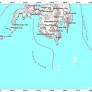
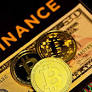
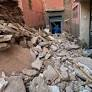
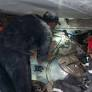
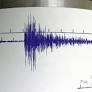
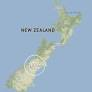
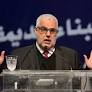
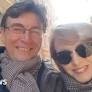

In [56]:
resp.text

In [15]:
def scrapeDate(a_href_div) -> Union[datetime, None]:
    """Scrape the date from the bottom div of the a_href_divs

    Args:
        a_href_div
            > Assumes the child_div is vaild and follows the structure of google search results
            and must be called as one of the div in a_href_divs.
    """
    # access the child div one level down only
    child_div = a_href_div.find("div", recursive=False)
    if child_div:
        # Find the div with style="bottom:0px"
        bottom_div = child_div.find("div", attrs={"style": "bottom:0px"})
        if bottom_div:
            # Get the <span> tag with the publication date
            span = bottom_div.find("span")
            if span:
                return convertTextDate(span.text)
    return None

def convertTextDate(text: str) -> Union[datetime, None]:
    """Convert the text date to datetime object

    Args:
        text (str): The text date scraped from the google search results
        Example: 20 hours ago, 1 day ago,1 month ago,4 weeks ago, 14 Jul 2023

    Returns:
        Union[datetime, None]: The datetime object of the text date or None if the text date is invalid
    """
    CurrentDate = datetime.now()
    
    # Check if the text date is in the format of "num xxxxx ago"
    if re.search(r"(\d+)\s+(min|hour|day|week|month|year)s?\s+ago", text):
        # Extract the number and the unit of time
        num, unit = re.search(r"(\d+)\s+(min|hour|day|week|month|year)s?\s+ago", text).groups()
        # Convert the number to int
        num = int(num)
        # Calculate the timedelta
        if unit == "min":
            delta = timedelta(minutes=num)
        elif unit == "hour":
            delta = timedelta(hours=num)
        elif unit == "day":
            delta = timedelta(days=num)
        elif unit == "week":
            delta = timedelta(weeks=num)
        elif unit == "month":
            delta = timedelta(days=num * 30)
        elif unit == "year":
            delta = timedelta(days=num * 365)
        else:
            return None
        # Calculate the date
        date = CurrentDate - delta
        return date
    # Check if the text date is in the format of "dd mmm yyyy"
    elif re.search(r"(\d+)\s+(\w+)\s+(\d+)", text):
        # Extract the day, month and year
        day, month, year = re.search(r"(\d+)\s+(\w+)\s+(\d+)", text).groups()
        # Convert the day to int
        day = int(day)
        # Convert the month to int
        month = datetime.strptime(month, "%b").month
        # Convert the year to int
        year = int(year)
        # Calculate the date
        date = datetime(year, month, day)
        return date
    else:
        return None


In [17]:
soup = BeautifulSoup(resp.text, "html.parser")
# Find the a tags with href attribute
a_href_divs = soup.find_all("a", attrs={"href": True})
# Extract the urls from the href attributes
for div in a_href_divs:
    url = div["href"]
    # Filter out non-article links
    if not url.startswith("https://"):
        continue
    
    # Regrex to filter out urls that have term "google"
    if re.search(r"(google)", url):
        continue
    # Yield the url
    print(url)
    
    # Scrape the date
    date = scrapeDate(div)
    print(date,type(date))

print(url)


https://www.phocuswire.com/no-longer-unexpected-cost-of-air-travel-disruptions-continues-to-rise
2023-09-26 20:11:41.015946 <class 'datetime.datetime'>
https://www.euronews.com/travel/2023/09/26/gatwick-covid-outbreak-forces-london-airport-to-cap-flights-until-sunday
2023-09-27 16:52:41.015946 <class 'datetime.datetime'>
https://www.independent.co.uk/travel/london-gatwick-flights-cancelled-easyjet-latest-b2419250.html
2023-09-27 13:11:41.015946 <class 'datetime.datetime'>
https://fortune.com/2023/09/26/covid-chaos-gatwick-britain-airport-cancel-flights-air-traffic-control-nats/
2023-09-26 19:11:41.017035 <class 'datetime.datetime'>
https://www.theguardian.com/uk-news/2023/sep/25/gatwick-restricts-flight-numbers-for-week-amid-air-traffic-control-problems
2023-09-26 17:11:41.017035 <class 'datetime.datetime'>
https://www.bbc.com/news/uk-66644369
2023-08-28 17:11:41.017035 <class 'datetime.datetime'>
https://www.nationalworld.com/lifestyle/travel/misery-london-gatwick-passengers-airport-l

# Round 2

In [1]:
from googlesearch import GoogleSearch

urls = GoogleSearch.getCategoryUrls('CNA')
urls

[{'url': 'https://www.channelnewsasia.com/commentary/libya-flood-natural-disaster-human-climate-change-3796761',
  'published_date': datetime.datetime(2023, 9, 26, 10, 39, 58, 696113)},
 {'url': 'https://www.channelnewsasia.com/asia/china-flood-heatwave-natural-disasters-july-3604616',
  'published_date': datetime.datetime(2023, 7, 4, 0, 0)},
 {'url': 'https://www.channelnewsasia.com/asia/india-pakistan-brace-severe-cyclone-deploy-rescuers-coastal-regions-3556066',
  'published_date': datetime.datetime(2023, 6, 12, 0, 0)},
 {'url': 'https://www.channelnewsasia.com/world/australia-emergency-workers-prepare-bushfire-crisis-wildfire-heatwave-drought-extreme-weather-climate-change-global-warming-3674606',
  'published_date': datetime.datetime(2023, 8, 29, 10, 39, 58, 696113)},
 {'url': 'https://www.channelnewsasia.com/asia/united-nations-report-climate-disasters-asia-narrow-window-global-warming-3652251',
  'published_date': datetime.datetime(2023, 7, 25, 0, 0)},
 {'url': 'https://www.chan

In [2]:
type(urls[0])

dict

In [2]:
from utils.Webscraper import Webscraper

# Test one category url 
article_url_date = urls[1]
print(article_url_date)
article = Webscraper.scrape(article_url_date)

print(f'article:{article},type article:{type(article)}')

{'url': 'https://www.channelnewsasia.com/asia/china-flood-heatwave-natural-disasters-july-3604616', 'published_date': datetime.datetime(2023, 7, 4, 0, 0)}
article:<newspaper.article.Article object at 0x00000236A5BBD8D0>,type article:<class 'newspaper.article.Article'>


In [3]:
article.publish_date

datetime.datetime(2023, 7, 4, 0, 0)

In [4]:
type(article)

newspaper.article.Article

# Testing Agent main

In [1]:
from llm.agent_main import AgentMain

article = AgentMain.processUrl(f'https://www.channelnewsasia.com/world/italy-storms-kills-two-airport-reopens-fire-3652556')

Article: Storms kill two in northern Italy, government readies state of emergency Successfully extracted from url:https://www.channelnewsasia.com/world/italy-storms-kills-two-airport-reopens-fire-3652556
CLASSIFIED NON-DISRUPTION EVENT ARTICLE -> Storms kill two in northern Italy, government readies state of emergency,
REASONING:"The given news article does not mention any disruption event. It primarily talks about severe storms in northern Italy and a heatwave in southern regions. These weather events, although impactful, do not fall under the list of valid disruption types." Exiting...


In [2]:
article

'CLASSIFIED AS NON-DISRUPTION EVENT ARTICLE -> Storms kill two in northern Italy, government readies state of emergency,\nREASONING:The given news article does not mention any disruption event. It primarily talks about severe storms in northern Italy and a heatwave in southern regions. These weather events, although impactful, do not fall under the list of valid disruption types.'

In [3]:
4*100

400